In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

from sklearn.datasets import fetch_california_housing

In [23]:
df = fetch_california_housing()
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names
## Independent and dependent features
X = dataset
y = df.target
## train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)
## Standardizing the dataset
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
scaler.inverse_transform(X_train)



array([[  11.95814581,  104.22276774,   24.92054155, ...,   25.62407097,
         107.90214514, -355.27316113],
       [  12.24644273,  683.85115603,   18.8734752 , ...,   24.42895103,
         116.23444529, -365.07854308],
       [  11.37602246,  356.23511048,   17.21275618, ...,   20.91869645,
         107.90214514, -356.1754969 ],
       ...,
       [   9.97343505,  419.23819616,   14.62063968, ...,   14.56885318,
         113.77748499, -363.99574017],
       [  14.61402401,  457.04004757,   16.89007177, ...,   17.50932998,
         107.45348283, -356.03513355],
       [   6.52321493,  217.62832197,   15.34814034, ...,   25.16384671,
         105.70156331, -351.28283187]])

In [24]:
###cross validation
model = LinearRegression()
model.fit(X_train,y_train)
score = cross_val_score(model,X_train,y_train, scoring='neg_mean_squared_error',cv=5)

np.mean(score)

-0.5281762474209333

0.5943232652466202

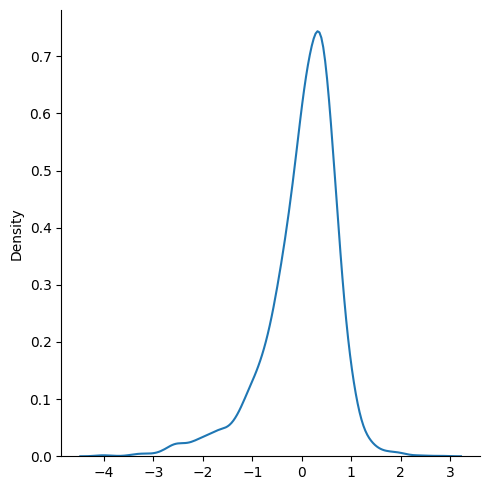

In [25]:
reg_pred = model.predict(X_test)

sns.displot(reg_pred-y_test, kind='kde')

r2_score(y_test,reg_pred)